- (First part based on previous research) films examined for male bias based on scripts/dialogue
    - male character line count, etc
    - and/or number of male characters (“above the line” talent)
- add in rotten tomatoes score for analysis of critical/journalistic/more academic reception 
- add in oscar nominations/wins for analysis of professional/peer reception 
- join these datasets based on movie title and year
- model relationships between these variables (step 1 predictor, steps 2 & 3 response) 

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # Dialogue set from Cornell Movie-Dialogs Corpus
# # For manual result recreation, if necessary

# # Lines data
# lines_raw = pd.read_csv("dialogue/movie_lines.tsv", header=None, names=["raw"])
# lines_split = lines_raw["raw"].str.split("\t", expand=False)

# fixed_rows = []
# for row in lines_split:
#     if len(row) > 5:
#         row = row[:4] + [" ".join(row[4:])]
#     elif len(row) < 5:
#         row += [None] * (5 - len(row))
#     fixed_rows.append(row)

# lines = pd.DataFrame(fixed_rows, columns=["lineID", "characterID", "movieID", "characterName", "text"])

# # Character data
# characters_raw = pd.read_csv("dialogue/movie_characters_metadata.tsv", header=None, names=["raw"])
# characters_split = characters_raw["raw"].str.split("\t", expand=False)

# fixed_rows = []
# for row in characters_split:
#     if len(row) > 6:
#         row = row[:4] + [" ".join(row[4:])]
#     elif len(row) < 6:
#         row += [None] * (6 - len(row))
#     fixed_rows.append(row)

# characters = pd.DataFrame(fixed_rows, columns=["characterID", "characterName", "movieID", "movieTitle", "gender", "creditPosition"])

# # Movie data
# pd_movies = pd.read_csv("dialogue/movie_titles_metadata.tsv", header=None, delimiter="\t", names=["movieID", "title", "year", "imdbRating", "imdbVotes", "genres"])

# # recreate gender analysis:
# # lines: break down to tokens/word count
# # aggregate number of lines/rows per character
# # join on chars 
# # agg per movie based on char gender

In [ ]:
# Using NLTK to tokenize text
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# lines["tokens"] = lines["text"].apply(lambda x: word_tokenize(x) if pd.notnull(x) else [])
# lines["token_count"] = lines["tokens"].apply(len)
# lines["word_count"] = lines["text"].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

### IMPORTS

In [130]:
# The Pudding's script gender analysis dataset:

gender_data = pd.read_csv("pudding/character_list5.csv", header=0, encoding="latin-1")
script_metadata = pd.read_csv("pudding/meta_data7.csv", header=0, encoding="latin-1")

gender_raw = gender_data.merge(script_metadata, how="left", on="script_id")
gender = gender_raw[["imdb_character_name", "words", "gender", "age", "title", "year"]].copy()

gender.loc[:, "title"] = gender["title"].str.replace(r'[^A-Za-z0-9 ]', '', regex=True).str.lower().str.strip()

gender["gender"] = gender["gender"].replace("?", np.nan)
gender["gender"] = gender["gender"].astype("category")
gender = gender.dropna(subset=["gender"])
# print(gender["gender"].isnull().sum())

gender = gender.rename(columns={"imdb_character_name": "character"})

print(gender.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23043 entries, 0 to 23047
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   character  23041 non-null  object  
 1   words      23043 non-null  int64   
 2   gender     23043 non-null  category
 3   age        18261 non-null  float64 
 4   title      23043 non-null  object  
 5   year       23043 non-null  int64   
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 1.1+ MB
None


In [131]:
# Rotten Tomatoes dataset

rt_raw = pd.read_csv("rt/rotten_tomatoes_movies.csv", header=0)
rt = rt_raw[["tomatometer_rating", "tomatometer_count", "tomatometer_top_critics_count", "tomatometer_fresh_critics_count", "tomatometer_rotten_critics_count"]].copy()

rt["title"] = rt_raw["movie_title"].str.replace(r'[^A-Za-z0-9 ]', '', regex=True).str.lower().str.strip()
rt["year"] = pd.to_datetime(rt_raw["original_release_date"]).dt.year
rt["tomatometer_status"] = rt_raw["tomatometer_status"].astype("category")

# print(rt.isnull().sum())
print(rt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   tomatometer_rating                17668 non-null  float64 
 1   tomatometer_count                 17668 non-null  float64 
 2   tomatometer_top_critics_count     17712 non-null  int64   
 3   tomatometer_fresh_critics_count   17712 non-null  int64   
 4   tomatometer_rotten_critics_count  17712 non-null  int64   
 5   title                             17712 non-null  object  
 6   year                              16546 non-null  float64 
 7   tomatometer_status                17668 non-null  category
dtypes: category(1), float64(3), int64(3), object(1)
memory usage: 986.2+ KB
None


In [132]:
# Oscars dataset

oscars_raw = pd.read_csv("oscars/the_oscar_award.csv", header=0)
oscars = oscars_raw[["winner"]].copy()

oscars["title"] = oscars_raw["film"].str.replace(r'[^A-Za-z0-9 ]', '', regex=True).str.lower().str.strip()
oscars["year"] = (oscars_raw["year_film"])
oscars["award"] = oscars_raw["canon_category"].astype("category")

# print(oscars.isnull().sum())
oscars = oscars.dropna(subset=["title"])

print(oscars.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10751 entries, 0 to 11105
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   winner  10751 non-null  bool    
 1   title   10751 non-null  object  
 2   year    10751 non-null  int64   
 3   award   10751 non-null  category
dtypes: bool(1), category(1), int64(1), object(1)
memory usage: 275.5+ KB
None


### DATA WRANGLING & TIDYING

In [164]:
# Calculate the number of words by character gender and number of male and female characters per film
film_gender = gender.groupby("title", observed=True).agg(
    words_male=("words", lambda x: x[gender.loc[x.index, "gender"]=="m"].sum()),
    words_female=("words", lambda x: x[gender.loc[x.index, "gender"]=="f"].sum()),
    num_male=("gender", lambda x: (x=="m").sum()),
    num_female=("gender", lambda x: (x=="f").sum()),
    year=("year", "first")
).reset_index()

# film_gender["dominant_gender"] = film_gender.apply(
#     lambda row: "m" if row.words_male >= row.words_female else "f",
#     axis=1
# )

# Determine gender dominance by ratio of word count to number of characters by gender
def dominant_by_ratio(row):
    male_ratio = row.words_male / row.num_male if row.num_male > 0 else 0
    female_ratio = row.words_female / row.num_female if row.num_female > 0 else 0
    return "m" if male_ratio >= female_ratio else "f"

film_gender["dominant_gender"] = film_gender.apply(dominant_by_ratio, axis=1)

print(film_gender.head())

                        title  words_male  words_female  num_male  num_female  \
0  10 things i hate about you       10688          8992         8           4   
1              12 and holding       10644          5324        10           5   
2            12 years a slave       16176          3452        22           6   
3                   127 hours        4336           809         1           3   
4                        1408        3039           284         3           1   

   year dominant_gender  
0  1999               f  
1  2005               f  
2  2013               m  
3  2010               m  
4  2007               m  


In [228]:
# Join on title and year for Academy Award data
oscars_full = pd.merge(film_gender, oscars, on=["title", "year"], how="inner")

# Split acting vs non-acting awards due to inherent gendering
if_act = oscars_full["award"].str.contains("ACTOR|ACTRESS", case=False, na=False)

oscars_acting = oscars_full[if_act] # acting awards
oscars_other = oscars_full[~if_act] # all other awards

print(oscars_full.info())
print(len(oscars_acting))
print(len(oscars_other))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   title            2283 non-null   object  
 1   words_male       2283 non-null   int64   
 2   words_female     2283 non-null   int64   
 3   num_male         2283 non-null   int64   
 4   num_female       2283 non-null   int64   
 5   year             2283 non-null   int64   
 6   dominant_gender  2283 non-null   object  
 7   winner           2283 non-null   bool    
 8   award            2283 non-null   category
dtypes: bool(1), category(1), int64(5), object(2)
memory usage: 131.9+ KB
None
517
1766


In [170]:
# Join on title and year for review data
gender_rt = pd.merge(film_gender, rt, on=["title", "year"], how="inner")
print(gender_rt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   title                             1612 non-null   object  
 1   words_male                        1612 non-null   int64   
 2   words_female                      1612 non-null   int64   
 3   num_male                          1612 non-null   int64   
 4   num_female                        1612 non-null   int64   
 5   year                              1612 non-null   int64   
 6   dominant_gender                   1612 non-null   object  
 7   tomatometer_rating                1611 non-null   float64 
 8   tomatometer_count                 1611 non-null   float64 
 9   tomatometer_top_critics_count     1612 non-null   int64   
 10  tomatometer_fresh_critics_count   1612 non-null   int64   
 11  tomatometer_rotten_critics_count  1612 non-null   int64 

### EDA

In [ ]:
# Aggregate for plotting
other_summary = oscars_other.groupby(["title", "year", "dominant_gender"], observed=True).agg(
    total_nominations=("award", "count"),
    total_wins=("winner", "sum")
).reset_index()

acting_summary = oscars_acting.groupby(["title", "year", "dominant_gender"], observed=True).agg(
    total_nominations=("award", "count"),
    actor_noms=("award", lambda x: (x.str.contains("ACTOR", case=False)).sum()),
    actress_noms=("award", lambda x: (x.str.contains("ACTRESS", case=False)).sum()),
    total_wins=("winner", "sum")
).reset_index()

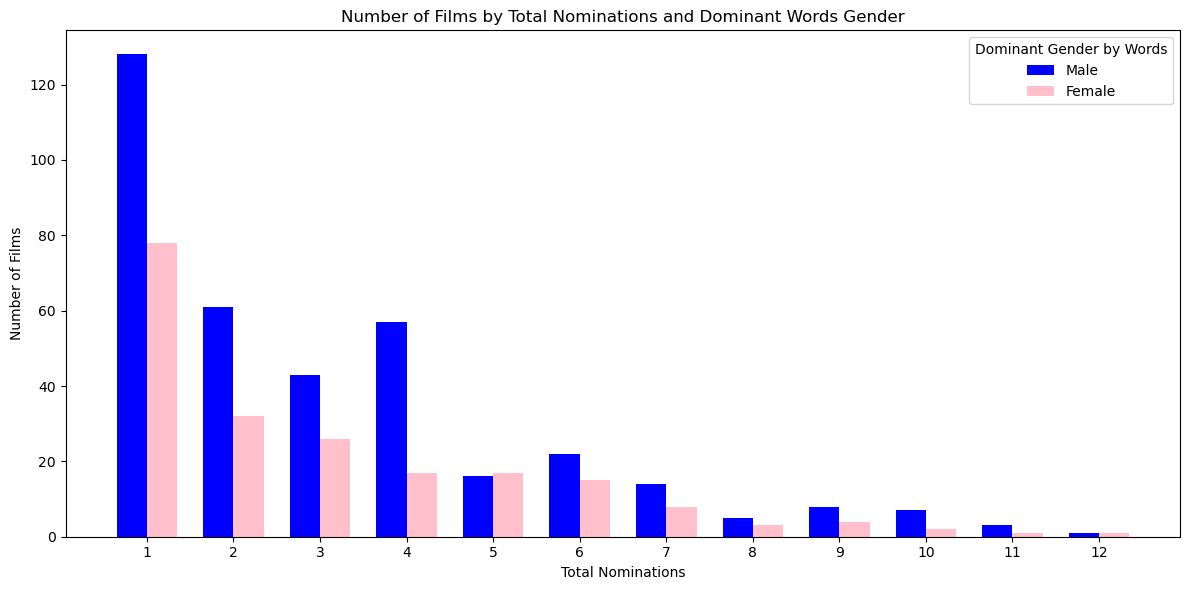

In [232]:
# Simple distribution of awards by dominant gender 
counts = other_summary.groupby(["total_nominations", "dominant_gender"], observed=True).size().reset_index(name="film_count")
counts_pivot = counts.pivot(index="total_nominations", columns="dominant_gender", values="film_count").fillna(0)

# Set positions
x = np.arange(len(counts_pivot.index))  # one position per nominations value
width = 0.35  # width of each bar

plt.figure(figsize=(12, 6))

# Plot Male bars
plt.bar(x - width/2, counts_pivot["m"], width, label="Male", color="blue")
# Plot Female bars
plt.bar(x + width/2, counts_pivot["f"], width, label="Female", color="pink")

plt.xlabel("Total Nominations")
plt.ylabel("Number of Films")
plt.title("Number of Films by Total Nominations and Dominant Words Gender")
plt.xticks(x, counts_pivot.index)
plt.legend(title="Dominant Gender by Words")
plt.tight_layout()
plt.show()